# Pandas Analysis

# Pandas: Data loading, cleaning, and manipulation.

In [23]:
import pandas as pd

# Load dataset
data = pd.read_csv('D:\Advance of python in 100 days\project\environmental-protection-expenditure-account-2009-2022.csv')

# Group data by year and calculate the average expenditure
yearly_expenditure = data.groupby('year')['data_value'].mean()

# Display the result
print(yearly_expenditure)

# Group data by year and calculate the average expenditure
yearly_expenditure = data.groupby('year')['data_value'].mean()

# Display the result
print(yearly_expenditure)


year
2009     2557.600000
2010     2626.476316
2011     2691.294737
2012     2746.857895
2013     2827.684211
2014     2940.426316
2015     3094.968421
2016     3203.652632
2017     3302.144737
2018     3555.815789
2019     3799.721053
2020     4143.155263
2021     9412.500000
2022    10588.905556
Name: data_value, dtype: float64
year
2009     2557.600000
2010     2626.476316
2011     2691.294737
2012     2746.857895
2013     2827.684211
2014     2940.426316
2015     3094.968421
2016     3203.652632
2017     3302.144737
2018     3555.815789
2019     3799.721053
2020     4143.155263
2021     9412.500000
2022    10588.905556
Name: data_value, dtype: float64


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Asus\AppData\Local\Temp\ipykernel_10584\3436320428.py:4: SyntaxWarning: invalid escape sequence '\A'
  data = pd.read_csv('D:\Advance of python in 100 days\project\environmental-protection-expenditure-account-2009-2022.csv')


# check the non value in the dataset

In [24]:
data.isnull().sum()

year          0
sector        0
class         0
cfn_tle1      0
cfn_tle2      0
units         0
magnitude     0
source        0
data_value    0
flag          0
dtype: int64

# check the duplicate the value in the dataset

In [32]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
487    False
488    False
489    False
490    False
491    False
Length: 492, dtype: bool

# Matplotlib Visualization

# Matplotlib: Visualization of trends and predictions.

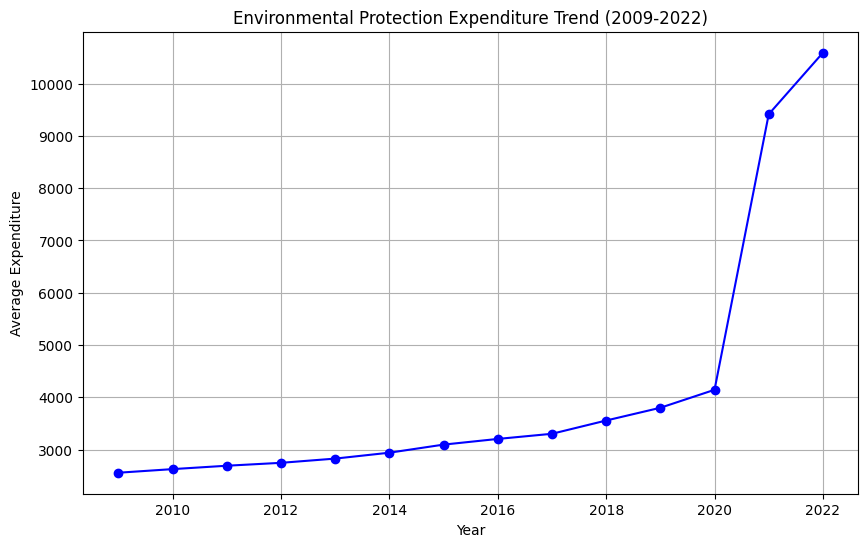

In [26]:
import matplotlib.pyplot as plt

# Plotting expenditure trends over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_expenditure.index, yearly_expenditure.values, marker='o', linestyle='-', color='b')
plt.title('Environmental Protection Expenditure Trend (2009-2022)')
plt.xlabel('Year')
plt.ylabel('Average Expenditure')
plt.grid(True)
plt.show()



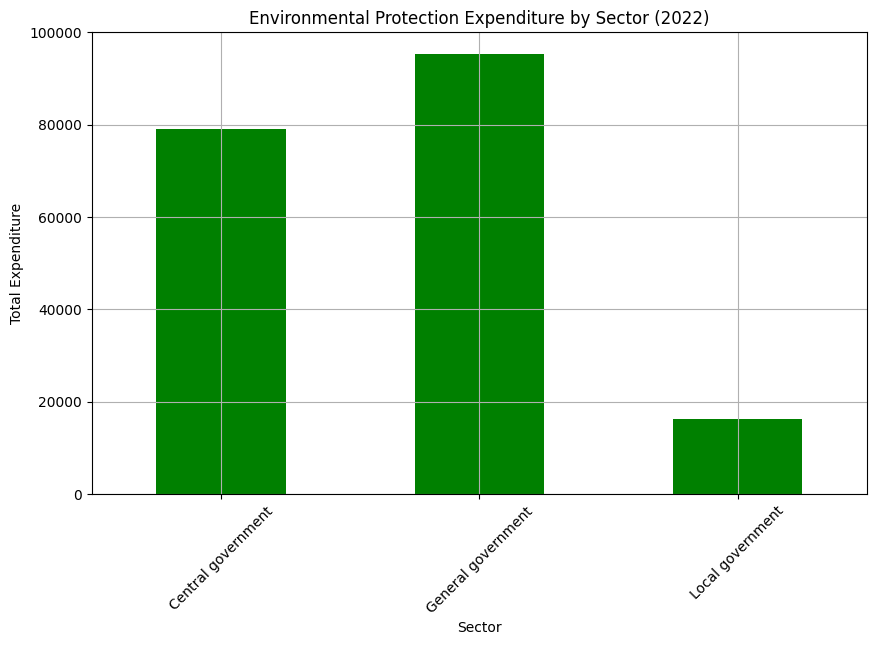

In [29]:
# Bar chart comparing sectors in the latest year (2022)
latest_year_data = data[data['year'] == 2022]
sector_expenditure = latest_year_data.groupby('sector')['data_value'].sum()

plt.figure(figsize=(10, 6))
sector_expenditure.plot(kind='bar', color='green')
plt.title('Environmental Protection Expenditure by Sector (2022)')
plt.xlabel('Sector')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


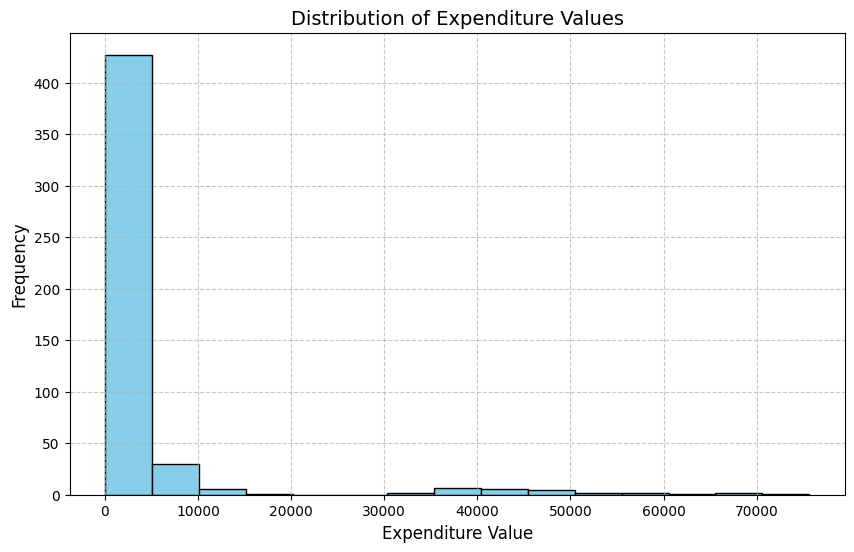

In [30]:
# Histogram of Expenditure Values
plt.figure(figsize=(10, 6))
plt.hist(data['data_value'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Expenditure Values', fontsize=14)
plt.xlabel('Expenditure Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

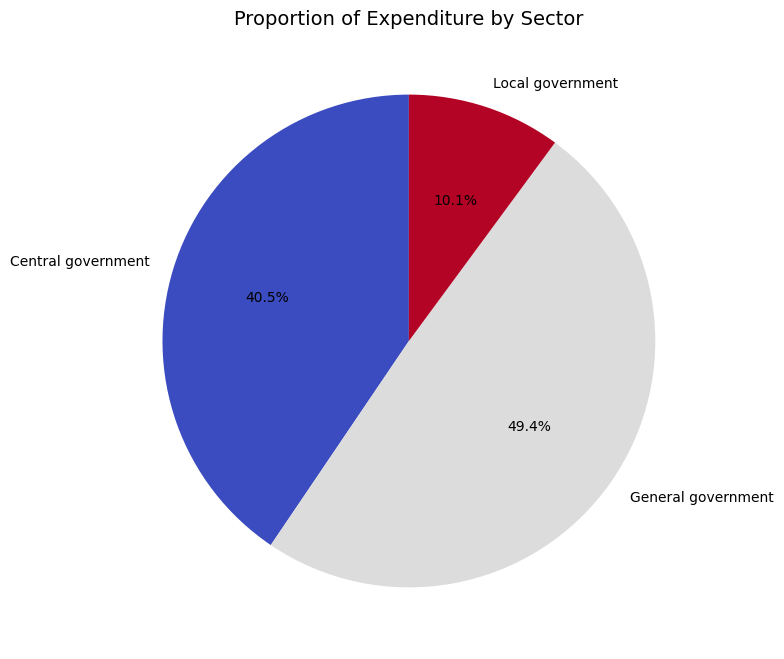

In [31]:
#  Pie Chart of Expenditure by Sector
sector_data = data.groupby('sector')['data_value'].sum()

plt.figure(figsize=(8, 8))
sector_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', legend=False)
plt.title('Proportion of Expenditure by Sector', fontsize=14)
plt.ylabel('')  # Hides the y-axis label for pie chart
plt.show()

# **Simple Linear Regression** - Predict expenditure based on the year

# Scikit-learn: Linear Regression for predictions.

Predicted expenditure for 2023: 7474.50


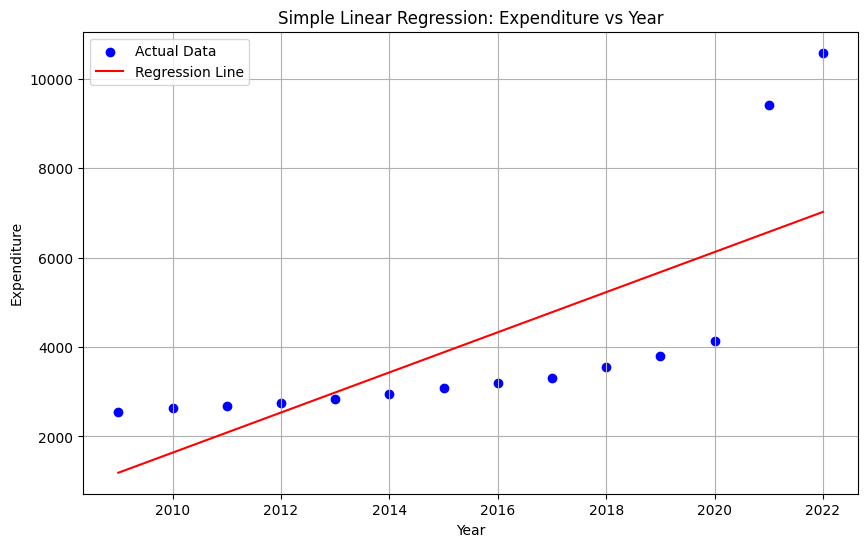

In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for linear regression
X = yearly_expenditure.index.values.reshape(-1, 1)  # Year as feature
y = yearly_expenditure.values  # Expenditure as target

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future expenditure for 2023
predicted_expenditure = model.predict(np.array([[2023]]))
print(f"Predicted expenditure for 2023: {predicted_expenditure[0]:.2f}")

# Plot the regression line
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Simple Linear Regression: Expenditure vs Year')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.legend()
plt.grid(True)
plt.show()



# **Multiple Linear Regression** - Predict expenditure using sector and year

# Scikit-learn: Linear Regression for predictions.

Model accuracy (R-squared): 0.12


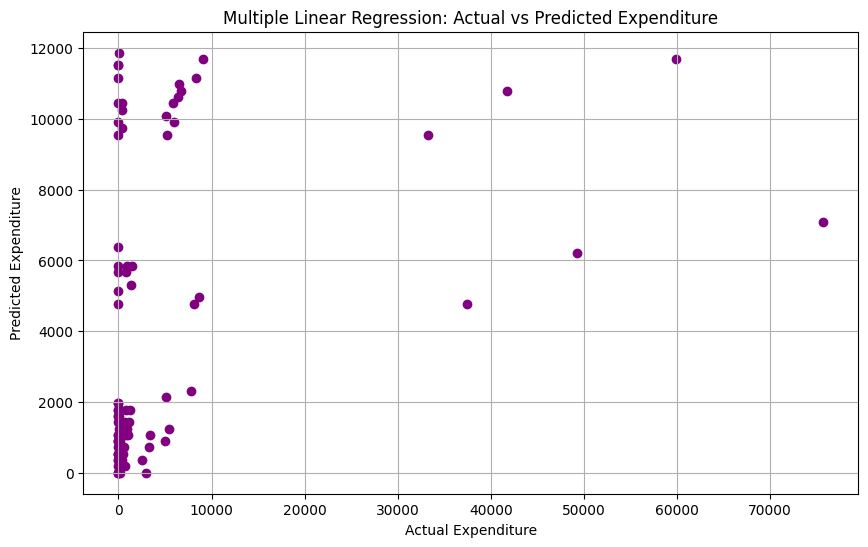

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features (sector and class)
le_sector = LabelEncoder()
data['sector_encoded'] = le_sector.fit_transform(data['sector'])

# Prepare data for multiple regression
X_multiple = data[['year', 'sector_encoded']]  # Year and sector as features
y_multiple = data['data_value']  # Expenditure as target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Train the model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_multiple.predict(X_test)
print(f"Model accuracy (R-squared): {model_multiple.score(X_test, y_test):.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.title('Multiple Linear Regression: Actual vs Predicted Expenditure')
plt.xlabel('Actual Expenditure')
plt.ylabel('Predicted Expenditure')
plt.grid(True)
plt.show()
